In [1]:
import numpy as np
from sklearn.datasets import make_classification

from utils import *
from solver import *

## Parameter

In [3]:
ndim = 10
ndata = 200

# ADMM
rho = 1E0
tol = 1E-6
max_iter = 1000

# Solver for primal subproblem
#solver = 'CG'
#solver_param = {'tol':1E-4, 'max_iter':50}
solver = 'direct'
solver_param = {}

# Constraint
#A = None               # No constraint
A = np.eye(ndim)        # Inequality constraint
                        #    A*x >= 0

## Generate data 

In [4]:
feature, label = make_classification(n_samples=ndata, n_features=ndim, n_redundant=0, n_informative=5, random_state=0)

ndata, ndim = feature.shape

# Make optimal weight positive
#feature[:, [0,1,3,4,8,9]] *= -1;

In [5]:
# ================ Pre-processing =============== #

# normalization
mean_feature = feature.mean(axis=0)
std_feature = feature.std(axis=0)
feature = (feature - mean_feature[np.newaxis,:]) / std_feature[np.newaxis,:]

## Newton ADMM with linear inequality constraints 

Solution:
 [[1.13251340e-04]
 [9.86425387e-05]
 [1.29251805e-01]
 [6.45149424e-02]
 [9.39919431e-05]
 [5.83482641e-01]
 [2.21472695e-01]
 [4.57314680e-01]
 [9.64728160e-05]
 [1.00869433e-04]]
Convergence


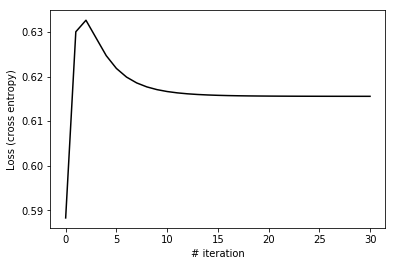

Gradient:
|G_x*|=3.02e-01, |G_0|=4.02e-01
Confusion matrix:
 [[73 28]
 [33 66]]
Precision 0.702, Recall 0.667


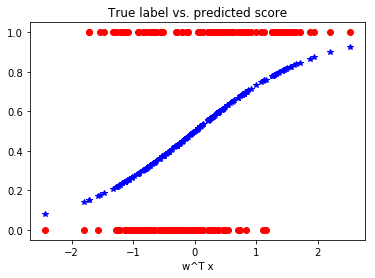

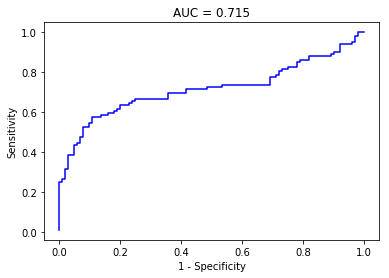

In [6]:
# Logistic Regression
weight, n_iter, cost_hist, *_ = ADMM_ineqcons(ndim, lambda x: CE(x, feature, label),
                                                    lambda x: g_CE(x, feature, label),
                                                    lambda x: h_CE(x, feature, label),
                                                    A=A, 
                                                    rho=rho, tol=tol, max_iter=max_iter,
                                                    solver=solver,
                                                    solver_param=solver_param,
                                                    verbose=False)
    
print('Solution:\n {0}'.format(weight[:, np.newaxis]))

print('Convergence')
plt.plot(cost_hist[:,1], 'k-')
plt.ylabel('Loss (cross entropy)')
plt.xlabel('# iteration')
plt.show()

examine(weight, feature, label)